In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, binarize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve


In [2]:
import warnings
warnings.filterwarnings("ignore")

**Note: For this exam two datasets are used. Q.1 and 2 should be answered for both the datasets. The first dataset dermatology.csv should be used for answering questions 3 to 7 and the second dataset should be used for answering question 8. Question no 9. should summarize all the findings for both the datasets.**

## 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [3]:
sonar=pd.read_csv("C:/Users/Yash/Desktop/DS/USL/sonar.csv")
sonar.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
der= pd.read_csv('C:/Users/Yash/Desktop/DS/USL/dermatology.csv',sep=',',names=['erythema','scaling','definite_borders','itching','koebner_phenomenon','polygonal_papules','follicular_papules','oral_mucosal_involvement','knee_and_elbow_involvement','scalp_involvement','family_history','melanin_incontinence','eosinophils_in_the_infiltrate','pnl_infiltrate','fibrosis_of_the_papillary_dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','clubbing_of_the_rete_ridges','elongation_of_the_rete_ridges','thinning_of_the_suprapapillary_epidermis','spongiform_pustule','munro_microabcess','focal_hypergranulosis','disappearance_of_the_granular_layer','vacuolisation_and_damage_of_basal_layer','spongiosis','saw-tooth_appearance_of_retes','follicular_horn_plug','perifollicular_parakeratosis','inflammatory_monoluclear_inflitrate','band-like_infiltrate','age','class'])
der.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


## 2.	Summarize important observations from the data set (5 Marks)
#### Some pointers which would help you, but don’t be limited by these


#### a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

In [8]:
# dataframe dimensions
print("This dataframe has {} rows and {} columns".format(*der.shape))

This dataframe has 366 rows and 35 columns


In [9]:
# dataframe dimensions
print("This dataframe has {} rows and {} columns".format(*sonar.shape))

This dataframe has 208 rows and 61 columns


In [10]:
der.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
erythema                                    366 non-null int64
scaling                                     366 non-null int64
definite_borders                            366 non-null int64
itching                                     366 non-null int64
koebner_phenomenon                          366 non-null int64
polygonal_papules                           366 non-null int64
follicular_papules                          366 non-null int64
oral_mucosal_involvement                    366 non-null int64
knee_and_elbow_involvement                  366 non-null int64
scalp_involvement                           366 non-null int64
family_history                              366 non-null int64
melanin_incontinence                        366 non-null int64
eosinophils_in_the_infiltrate               366 non-null int64
pnl_infiltrate                              366 non-null int64
fibrosis_of_t

In [11]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
1        208 non-null float64
2        208 non-null float64
3        208 non-null float64
4        208 non-null float64
5        208 non-null float64
6        208 non-null float64
7        208 non-null float64
8        208 non-null float64
9        208 non-null float64
10       208 non-null float64
11       208 non-null float64
12       208 non-null float64
13       208 non-null float64
14       208 non-null float64
15       208 non-null float64
16       208 non-null float64
17       208 non-null float64
18       208 non-null float64
19       208 non-null float64
20       208 non-null float64
21       208 non-null float64
22       208 non-null float64
23       208 non-null float64
24       208 non-null float64
25       208 non-null float64
26       208 non-null float64
27       208 non-null float64
28       208 non-null float64
29       208 non-null float64
30       208 non-null flo

In [15]:
numerical_cols = der.select_dtypes(include="number").columns
print('There are',len(numerical_cols),'numeric columns in dermatology dataset')

There are 34 numeric columns in dermatology dataset


In [16]:
categorical_cols = der.select_dtypes(include="object").columns

print('There are',len(categorical_cols),'categorical columns in dermatology dataset')

There are 1 categorical columns in dermatology dataset


In [17]:
numerical_cols = sonar.select_dtypes(include="number").columns
print('There are',len(numerical_cols),'numeric columns in sonar dataset')

There are 60 numeric columns in sonar dataset


In [18]:
categorical_cols = sonar.select_dtypes(include="object").columns

print('There are',len(categorical_cols),'categorical columns in sonar dataset')

There are 1 categorical columns in sonar dataset


In [19]:
sonar.dtypes.value_counts()

float64    60
object      1
dtype: int64

In [20]:
der.dtypes.value_counts()

int64     34
object     1
dtype: int64

#### b.	Calculate five-point summary for numerical variables

In [21]:
der.describe().T

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


In [22]:
sonar.describe().T

,count,mean,std,min,25%,50%,75%,max
1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


#### c.	Summarize observations for categorical variables – no. of categories, % observations in each category

In [32]:

for i in der.columns:
   print('Column = ',i)
   print(der[i].value_counts())

Column =  erythema
2    215
3     90
1     57
0      4
Name: erythema, dtype: int64
Column =  scaling
2    195
1    111
3     52
0      8
Name: scaling, dtype: int64
Column =  definite_borders
2    168
1     93
0     59
3     46
Name: definite_borders, dtype: int64
Column =  itching
0    118
2    100
3     76
1     72
Name: itching, dtype: int64
Column =  koebner_phenomenon
0    224
1     70
2     54
3     18
Name: koebner_phenomenon, dtype: int64
Column =  polygonal_papules
0    297
2     41
3     27
1      1
Name: polygonal_papules, dtype: int64
Column =  follicular_papules
0    333
2     16
1     11
3      6
Name: follicular_papules, dtype: int64
Column =  oral_mucosal_involvement
0    299
2     45
3     13
1      9
Name: oral_mucosal_involvement, dtype: int64
Column =  knee_and_elbow_involvement
0    251
2     64
1     28
3     23
Name: knee_and_elbow_involvement, dtype: int64
Column =  scalp_involvement
0    264
2     56
1     30
3     16
Name: scalp_involvement, dtype: int64
Colu

In [25]:
print('Percentage of categories in each variable')
for i in cat_col:
   print('Column = ',i)
   print(der[i].value_counts()/len(der[i]))    

Percentage of categories in each variable
Column =  age
50    0.046448
40    0.046448
27    0.043716
36    0.043716
22    0.040984
55    0.038251
25    0.038251
35    0.038251
30    0.035519
33    0.032787
60    0.030055
52    0.030055
42    0.027322
18    0.024590
34    0.021858
20    0.021858
?     0.021858
62    0.019126
8     0.019126
45    0.019126
10    0.019126
51    0.019126
32    0.016393
46    0.016393
19    0.016393
47    0.016393
48    0.013661
28    0.013661
44    0.013661
17    0.013661
        ...   
16    0.013661
43    0.010929
70    0.010929
7     0.010929
41    0.010929
26    0.008197
21    0.008197
29    0.008197
23    0.008197
38    0.008197
12    0.008197
57    0.005464
61    0.005464
15    0.005464
9     0.005464
31    0.005464
39    0.005464
65    0.005464
24    0.005464
37    0.005464
53    0.005464
13    0.005464
49    0.002732
64    0.002732
75    0.002732
0     0.002732
67    0.002732
58    0.002732
63    0.002732
68    0.002732
Name: age, Length: 61, dtype:

In [33]:
for i in sonar.columns:
   print('Column = ',i)
   print(sonar[i].value_counts())

Column =  1
0.0201    5
0.0209    3
0.0094    3
0.0131    3
0.0100    3
0.0293    2
0.0231    2
0.0211    2
0.0130    2
0.0228    2
0.0164    2
0.0235    2
0.0123    2
0.0260    2
0.0368    2
0.0216    2
0.0162    2
0.0093    2
0.0195    2
0.0217    2
0.0335    2
0.0270    2
0.0116    2
0.0126    2
0.0152    1
0.0442    1
0.0086    1
0.0258    1
0.0331    1
0.0408    1
         ..
0.0305    1
0.0261    1
0.0079    1
0.0190    1
0.0257    1
0.0790    1
0.0134    1
0.0253    1
0.0392    1
0.0071    1
0.0712    1
0.0731    1
0.0412    1
0.0454    1
0.0298    1
0.0294    1
0.0129    1
0.0163    1
0.0491    1
0.0274    1
0.1150    1
0.0286    1
0.0323    1
0.1083    1
0.0039    1
0.1313    1
0.0453    1
0.0202    1
0.0378    1
0.0459    1
Name: 1, Length: 177, dtype: int64
Column =  2
0.0509    2
0.0378    2
0.0215    2
0.0186    2
0.0279    2
0.0421    2
0.0308    2
0.0213    2
0.0453    2
0.0222    2
0.0116    2
0.0363    2
0.0086    2
0.0433    2
0.0318    2
0.0221    2
0.0152    2
0.017

Column =  47
0.0530    2
0.0790    2
0.1344    2
0.0805    2
0.0797    2
0.0426    2
0.0882    1
0.2241    1
0.1689    1
0.0621    1
0.0434    1
0.0624    1
0.1125    1
0.1587    1
0.0205    1
0.0674    1
0.1991    1
0.1985    1
0.1096    1
0.0562    1
0.2526    1
0.0931    1
0.0439    1
0.3287    1
0.0183    1
0.2193    1
0.0841    1
0.0804    1
0.5522    1
0.0779    1
         ..
0.0264    1
0.2594    1
0.1960    1
0.1316    1
0.0319    1
0.3877    1
0.1539    1
0.1225    1
0.1077    1
0.0567    1
0.0598    1
0.0452    1
0.1190    1
0.1227    1
0.0694    1
0.1521    1
0.1111    1
0.1964    1
0.0604    1
0.0951    1
0.0623    1
0.1258    1
0.0500    1
0.1394    1
0.0608    1
0.0945    1
0.1482    1
0.0991    1
0.0761    1
0.0000    1
Name: 47, Length: 202, dtype: int64
Column =  48
0.0744    2
0.0309    2
0.0748    2
0.0469    2
0.1701    1
0.2761    1
0.1792    1
0.0422    1
0.1558    1
0.1403    1
0.1500    1
0.2484    1
0.0849    1
0.2052    1
0.2458    1
0.0785    1
0.0627    1
0.

In [27]:
print('Percentage of categories in each variable')
for i in cat_col:
   print('Column = ',i)
   print(sonar[i].value_counts()/len(sonar[i]))

Percentage of categories in each variable
Column =  55
0.0036    0.024038
0.0075    0.024038
0.0079    0.019231
0.0062    0.019231
0.0038    0.019231
0.0043    0.019231
0.0039    0.019231
0.0045    0.014423
0.0068    0.014423
0.0121    0.014423
0.0164    0.014423
0.0013    0.014423
0.0030    0.014423
0.0058    0.014423
0.0072    0.014423
0.0114    0.014423
0.0065    0.014423
0.0037    0.014423
0.0012    0.014423
0.0070    0.009615
0.0190    0.009615
0.0180    0.009615
0.0158    0.009615
0.0052    0.009615
0.0096    0.009615
0.0094    0.009615
0.0102    0.009615
0.0035    0.009615
0.0025    0.009615
0.0109    0.009615
            ...   
0.0078    0.004808
0.0073    0.004808
0.0042    0.004808
0.0276    0.004808
0.0372    0.004808
0.0105    0.004808
0.0196    0.004808
0.0014    0.004808
0.0085    0.004808
0.0159    0.004808
0.0060    0.004808
0.0138    0.004808
0.0018    0.004808
0.0059    0.004808
0.0447    0.004808
0.0051    0.004808
0.0252    0.004808
0.0064    0.004808
0.0185    0.00

In [34]:

der[der['age']=='?']

der['age'] = der['age'].replace('?', np.NaN)

for i in der[der['age'].isna()].index:
  der.loc[i,'age'] = round(der[der['class'] == der.loc[i,'class']]['age'].dropna().astype('int64').mean())

der['age'] = der['age'].astype('int64')

cleaning age column and fill missing values with mean.

#### d.	Generate the covariance and correlation tables for the data

In [28]:
der.corr()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,-0.013761,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,-0.085021,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,-0.468688
definite_borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.291147,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,0.363488,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.400409,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,0.880972,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.118710,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,0.884351,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,-0.267508,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,-0.255554,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,-0.533208


In [29]:
der.cov()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
erythema,0.441897,0.203077,0.156905,-0.036036,0.000419,0.021364,-0.041553,-0.014866,0.092140,0.112389,...,-0.007770,0.091474,0.001624,0.016880,-0.003668,-0.001632,0.003099,0.036567,-0.005113,-0.356389
scaling,0.203077,0.492140,0.227914,-0.067236,-0.006737,-0.050393,-0.036986,-0.048552,0.205771,0.191601,...,-0.050662,0.128318,-0.073366,0.009634,-0.076667,-0.003324,-0.003818,-0.005592,-0.102470,-0.525354
definite_borders,0.156905,0.227914,0.823602,-0.064631,0.198877,0.284752,-0.086301,0.217022,0.269683,0.220975,...,0.224433,0.278464,0.258320,-0.262093,0.237907,-0.035257,-0.054974,0.073726,0.283607,-0.568381
itching,-0.036036,-0.067236,-0.064631,1.295726,0.276877,0.446456,-0.094064,0.341029,-0.335280,-0.160446,...,0.351448,-0.189700,0.399611,0.022532,0.408833,-0.090171,-0.102403,0.051890,0.486788,0.099618
koebner_phenomenon,0.000419,-0.006737,0.198877,0.276877,0.824493,0.342586,-0.089498,0.297328,-0.059241,0.012501,...,0.308826,0.003398,0.326417,-0.006093,0.330893,-0.060514,-0.072940,0.054959,0.384445,-0.132495
polygonal_papules,0.021364,-0.050393,0.284752,0.446456,0.342586,0.916476,-0.074886,0.690860,-0.259780,-0.219552,...,0.716371,-0.099109,0.833341,0.086623,0.818130,-0.041171,-0.051561,0.158784,0.959009,0.088390
follicular_papules,-0.041553,-0.036986,-0.086301,-0.094064,-0.089498,-0.074886,0.325571,-0.063014,0.124658,-0.001826,...,-0.057534,-0.077626,-0.076256,-0.008676,-0.075799,0.201826,0.235616,-0.035160,-0.084475,0.435616
oral_mucosal_involvement,-0.014866,-0.048552,0.217022,0.341029,0.297328,0.690860,-0.063014,0.695801,-0.232428,-0.196272,...,0.626589,-0.076982,0.706939,0.113452,0.697013,-0.031035,-0.043386,0.151987,0.823175,0.074377
knee_and_elbow_involvement,0.092140,0.205771,0.269683,-0.335280,-0.059241,-0.259780,0.124658,-0.232428,0.966247,0.586840,...,-0.223355,0.409567,-0.264833,-0.459039,-0.263148,0.103121,0.123782,-0.048978,-0.300808,-0.602021
scalp_involvement,0.112389,0.191601,0.220975,-0.160446,0.012501,-0.219552,-0.001826,-0.196272,0.586840,0.820181,...,-0.196587,0.382873,-0.218340,-0.430616,-0.222397,-0.021169,-0.007680,0.023116,-0.250363,-0.771570


In [30]:
sonar.corr()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [31]:
sonar.cov()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
1,0.000529,0.000558,0.000505,0.000526,0.000440,0.000325,0.000371,0.000696,0.000962,0.000984,...,7.025008e-05,0.000079,5.060106e-05,0.000054,5.085173e-05,0.000029,0.000042,0.000055,0.000051,0.000040
2,0.000558,0.001086,0.000988,0.000930,0.000768,0.000647,0.000568,0.000939,0.001236,0.001200,...,1.268688e-04,0.000138,8.053483e-05,0.000092,8.880939e-05,0.000050,0.000053,0.000075,0.000072,0.000059
3,0.000505,0.000988,0.001477,0.001398,0.001166,0.000786,0.000452,0.000778,0.001150,0.001135,...,1.098793e-04,0.000146,9.032463e-05,0.000103,7.891224e-05,0.000063,0.000085,0.000083,0.000101,0.000072
4,0.000526,0.000930,0.001398,0.002165,0.001879,0.000970,0.000708,0.000978,0.001361,0.001487,...,9.759676e-05,0.000168,1.198287e-04,0.000114,9.397046e-05,0.000075,0.000092,0.000104,0.000121,0.000094
5,0.000440,0.000768,0.001166,0.001879,0.003086,0.001960,0.001151,0.000965,0.001170,0.001368,...,7.734075e-05,0.000143,1.235425e-04,0.000083,7.735761e-05,0.000064,0.000071,0.000086,0.000100,0.000071
6,0.000325,0.000647,0.000786,0.000970,0.001960,0.003493,0.002567,0.002374,0.002292,0.002293,...,1.219147e-04,0.000144,6.777177e-05,0.000071,5.591053e-05,0.000057,0.000055,0.000078,0.000081,0.000053
7,0.000371,0.000568,0.000452,0.000708,0.001151,0.002567,0.003818,0.003555,0.003442,0.003533,...,1.366372e-04,0.000086,2.024295e-05,0.000074,8.563311e-05,0.000062,0.000067,0.000097,0.000070,0.000069
8,0.000696,0.000939,0.000778,0.000978,0.000965,0.002374,0.003555,0.007251,0.007849,0.007469,...,2.665704e-04,0.000180,6.159155e-05,0.000145,1.445756e-04,0.000135,0.000132,0.000158,0.000102,0.000063
9,0.000962,0.001236,0.001150,0.001361,0.001170,0.002292,0.003442,0.007849,0.014016,0.013958,...,2.486084e-04,0.000237,8.805901e-05,0.000175,1.504830e-04,0.000158,0.000133,0.000178,0.000071,0.000057
10,0.000984,0.001200,0.001135,0.001487,0.001368,0.002293,0.003533,0.007469,0.013958,0.018068,...,2.697150e-04,0.000214,9.257086e-05,0.000144,1.669628e-04,0.000117,0.000109,0.000185,0.000048,0.000066


### 3.	Perform Exploratory Data Analysis (5 Marks)

### a.	Create Visualization plots to find the pattern amongst the variables.

In [35]:
columns=['erythema', 'scaling', 'definite_borders', 'itching',
      'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
      'oral_mucosal_involvement', 'knee_and_elbow_involvement',
      'scalp_involvement', 'family_history', 'melanin_incontinence',
      'eosinophils_in_the_infiltrate', 'pnl_infiltrate',
      'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
      'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
      'elongation_of_the_rete_ridges',
      'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
      'munro_microabcess', 'focal_hypergranulosis',
      'disappearance_of_the_granular_layer',
      'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
      'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
      'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
      'band-like_infiltrate',  'class']

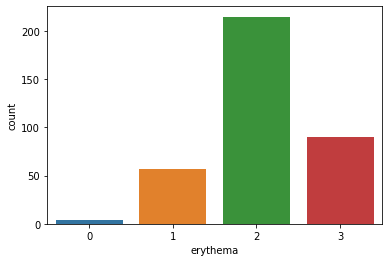

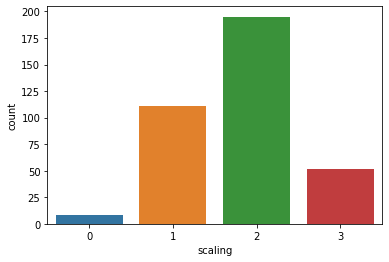

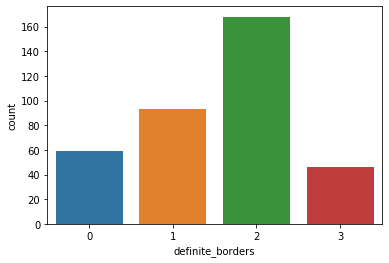

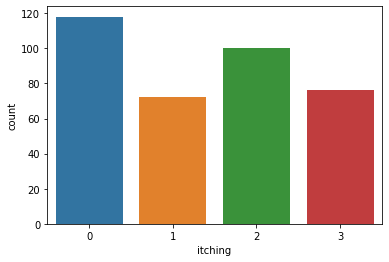

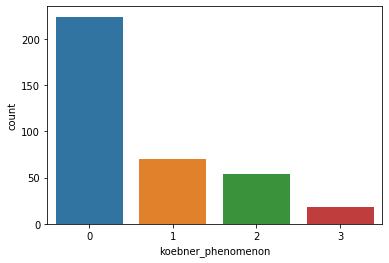

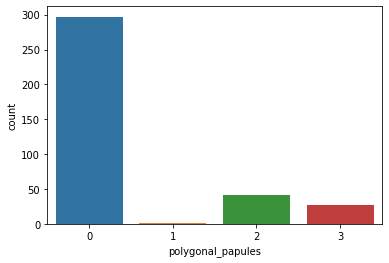

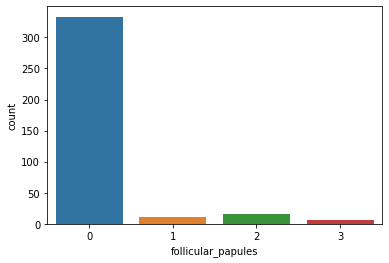

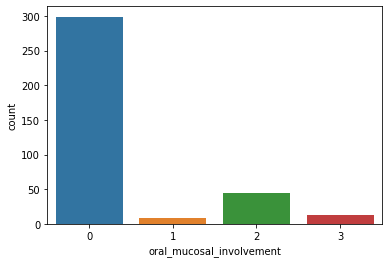

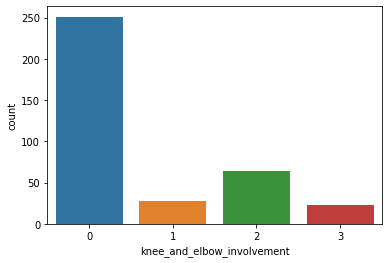

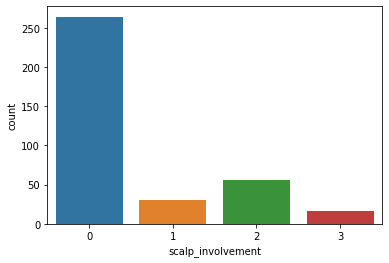

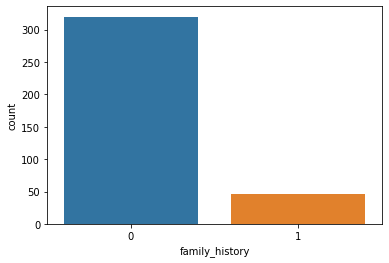

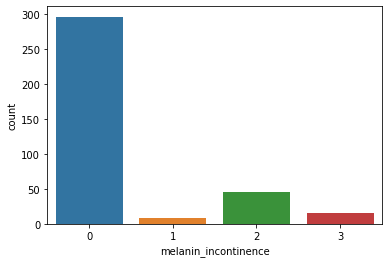

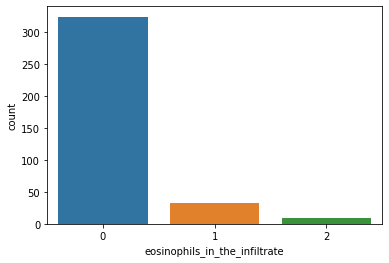

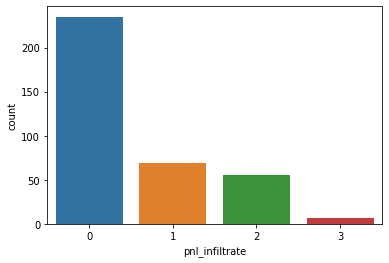

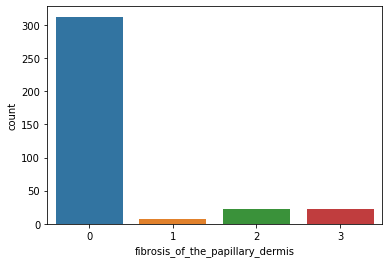

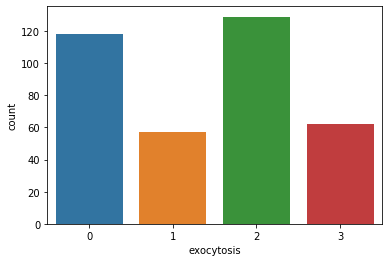

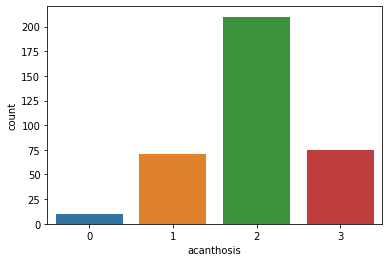

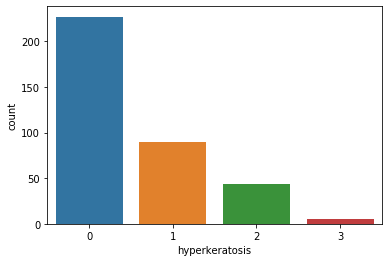

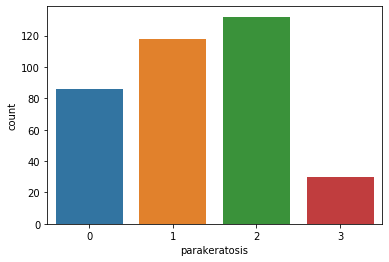

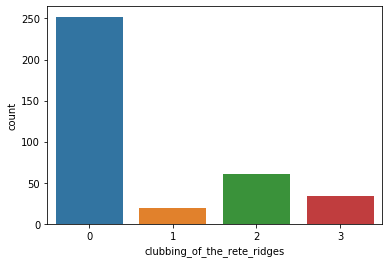

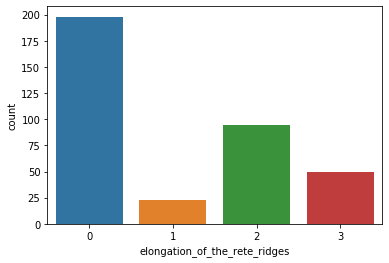

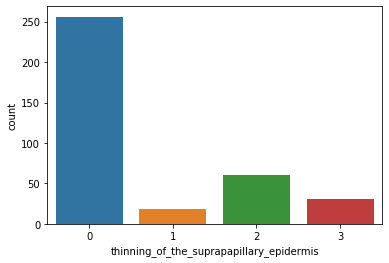

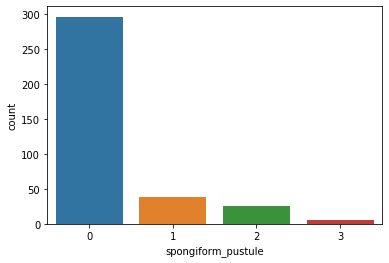

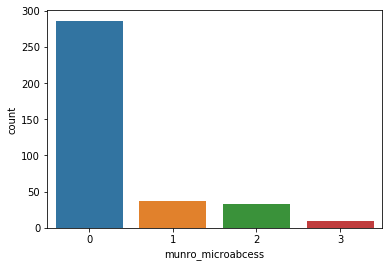

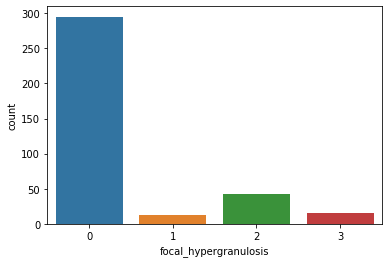

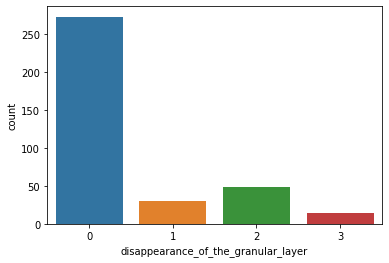

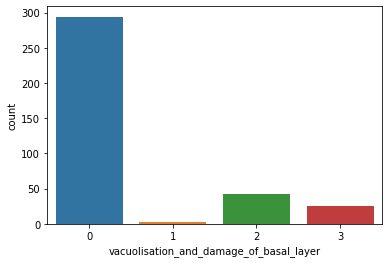

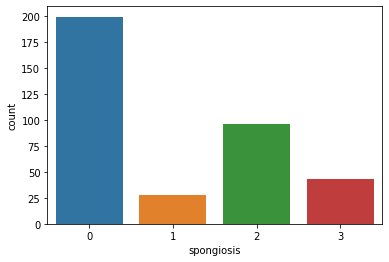

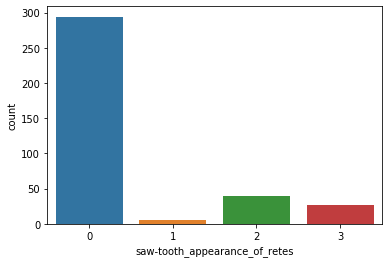

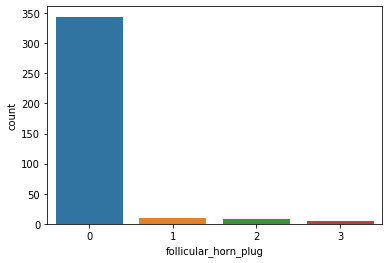

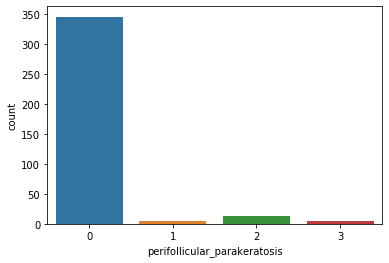

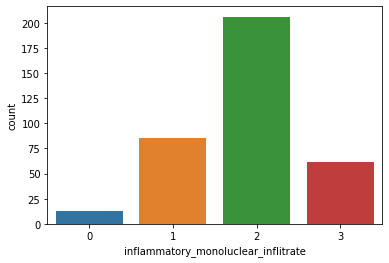

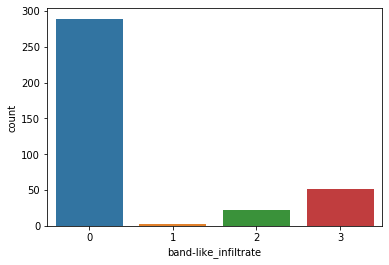

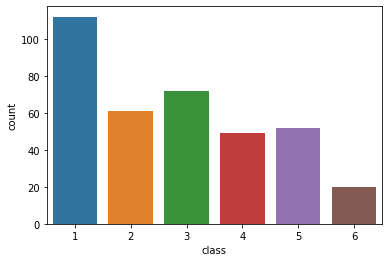

In [36]:
for i in columns:
   sns.countplot(der[i])
   plt.show()

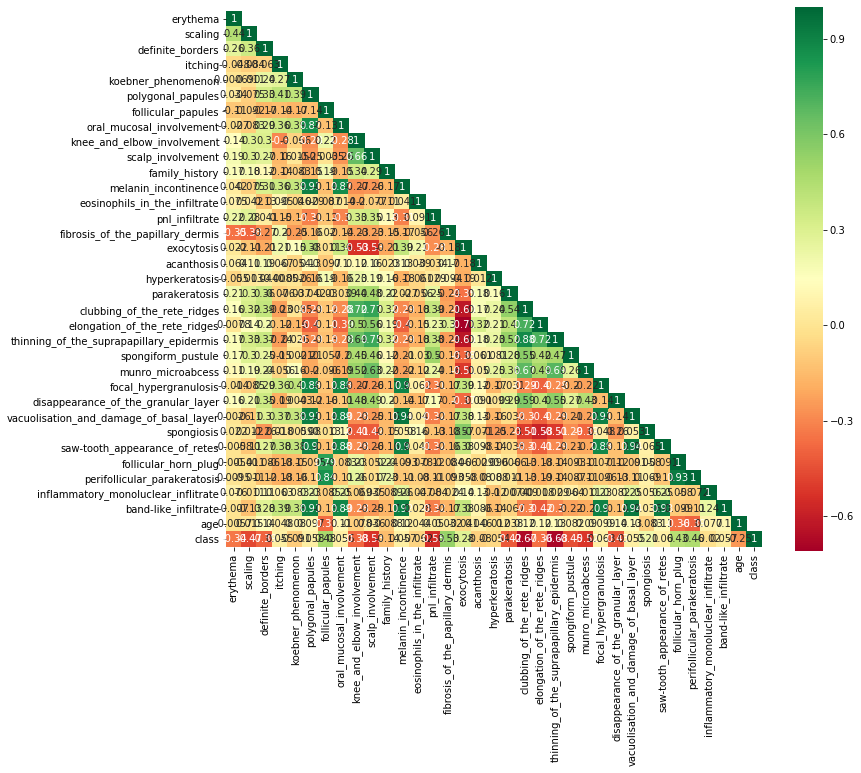

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(der.corr(), annot=True, cmap='RdYlGn', square=True, mask=np.triu(der.corr(), 1))
plt.show()

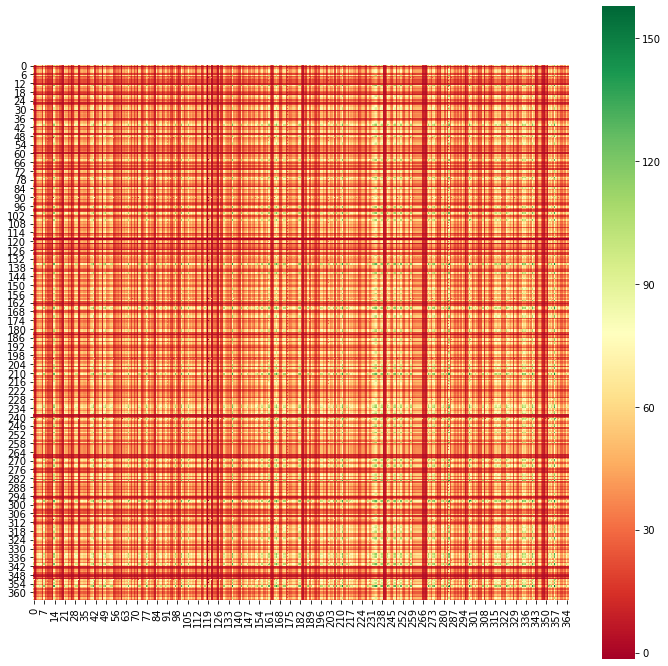

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(pd.DataFrame(np.cov(der)), cmap='RdYlGn', square=True)
plt.show()

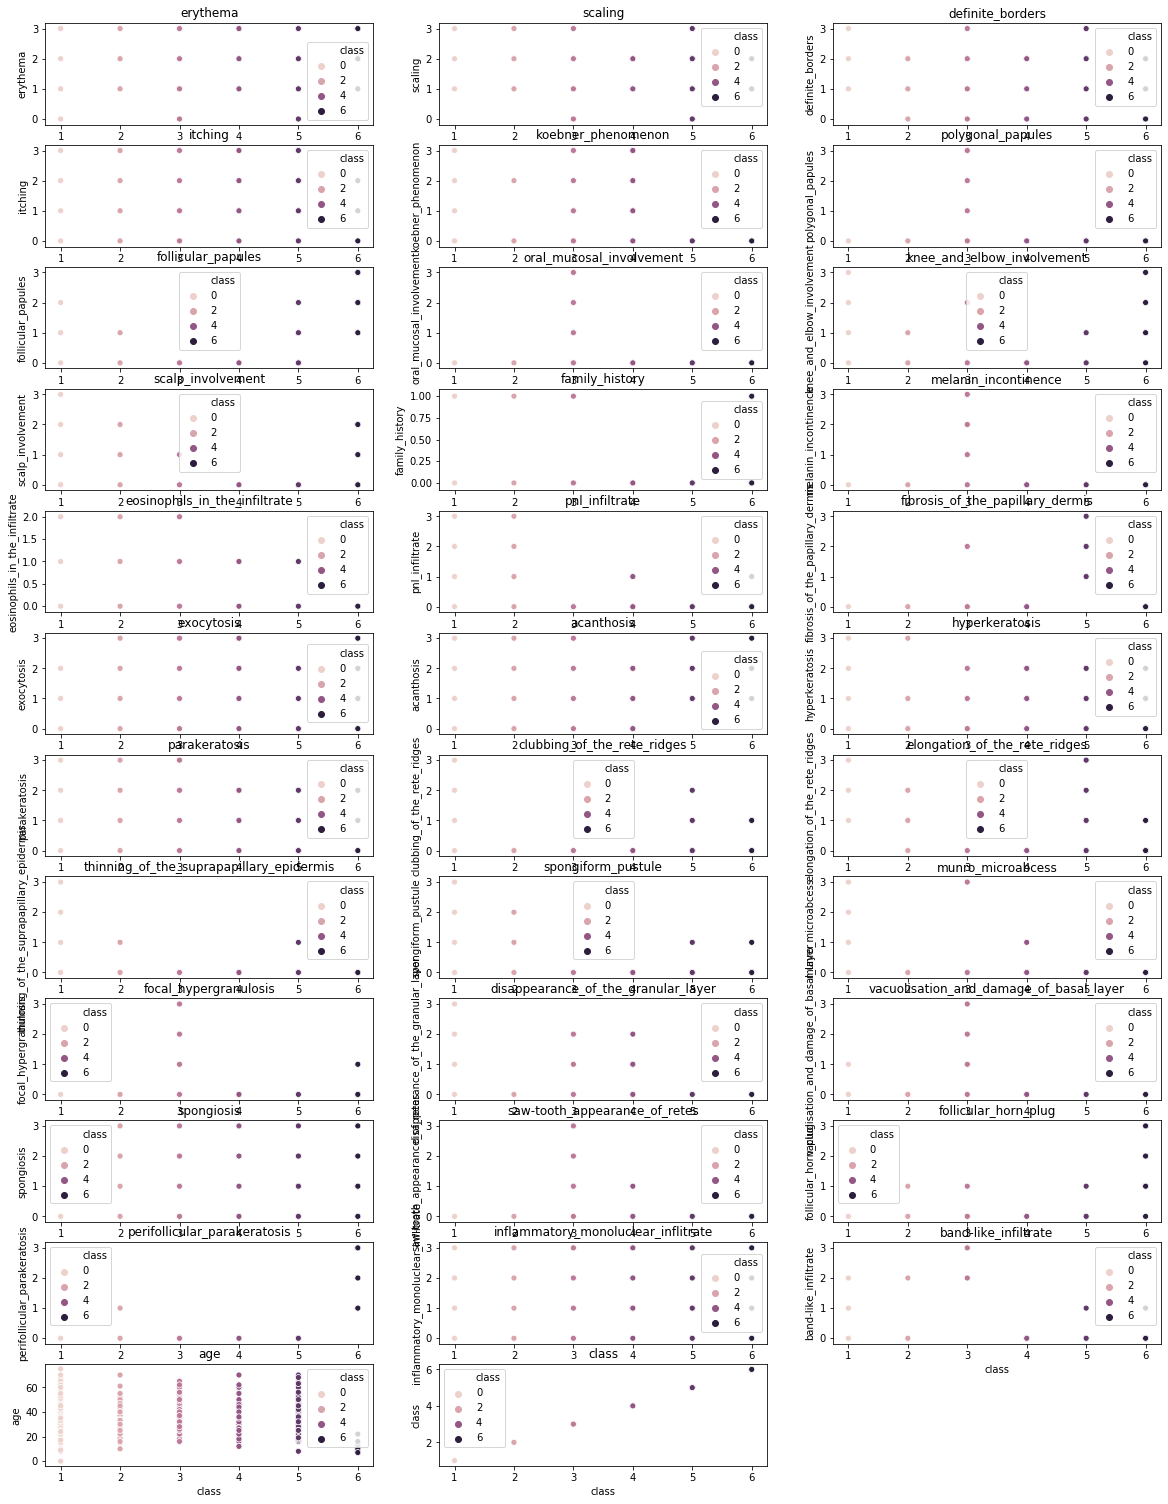

In [43]:
cols =der.select_dtypes(exclude='object')
p=1
plt.figure(figsize=(20,40))
for i in cols:
   plt.subplot(18,3,p)
   sns.scatterplot(der["class"],der[i],hue=der['class'])
   plt.title(i)
   plt.ylabel(i)
   plt.xlabel("class")
   p=p+1
plt.show()

We create scatter plots for better visualization.We can clearly see the pattern.

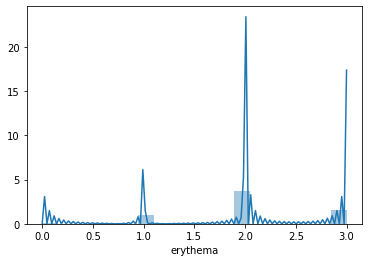

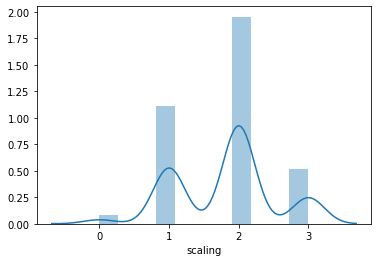

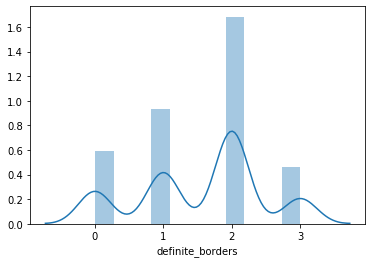

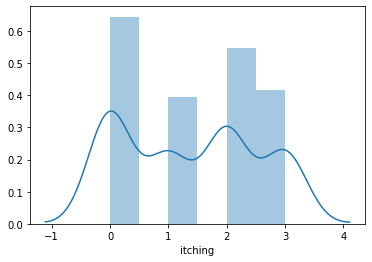

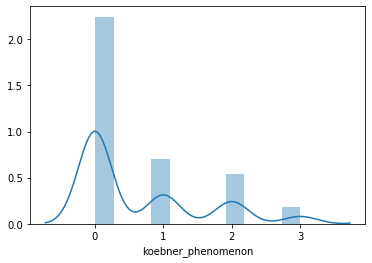

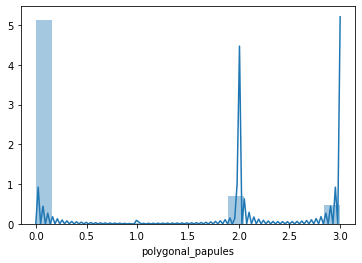

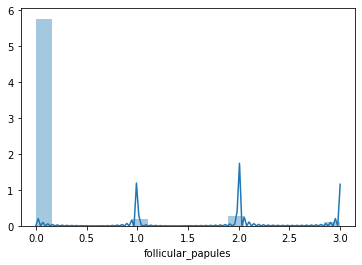

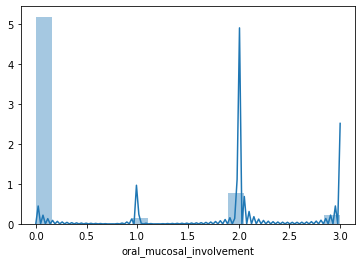

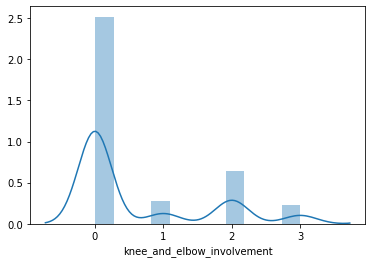

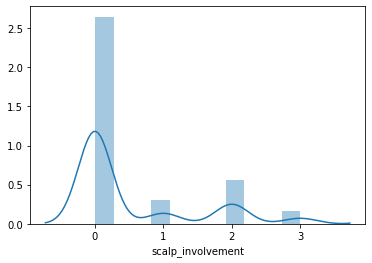

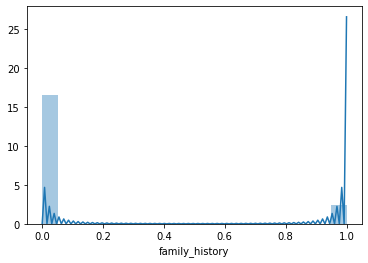

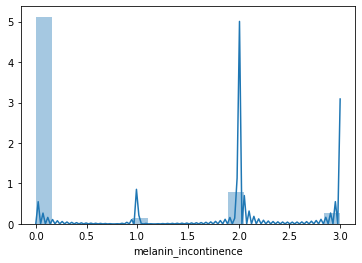

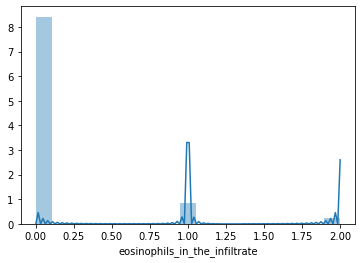

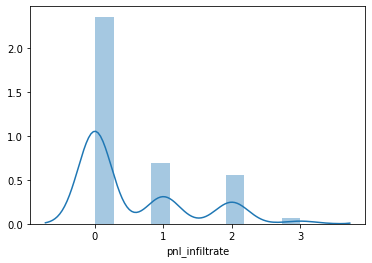

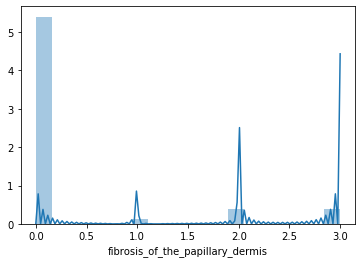

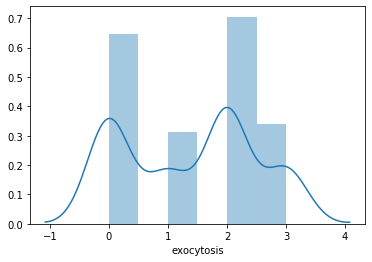

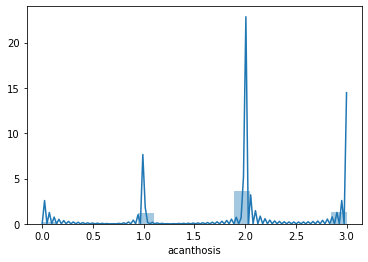

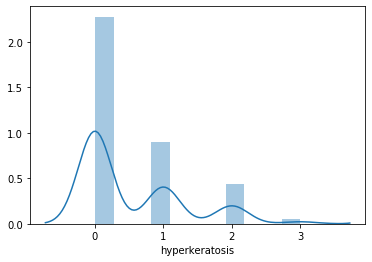

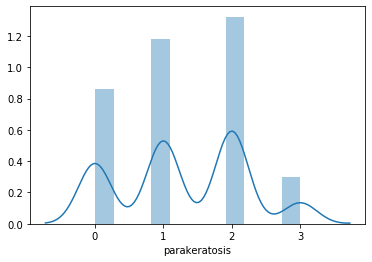

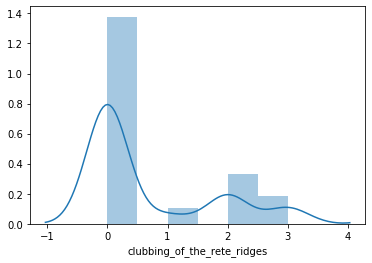

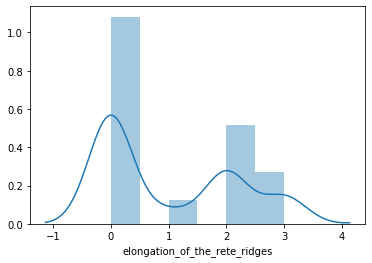

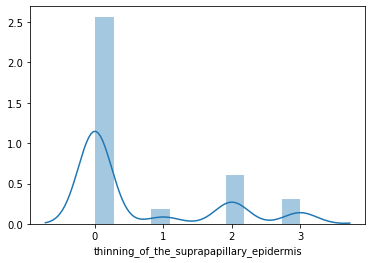

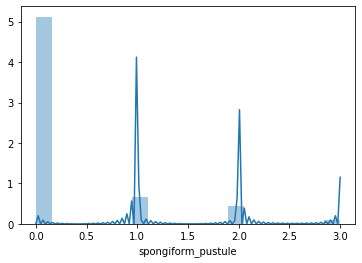

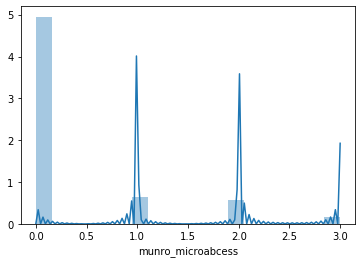

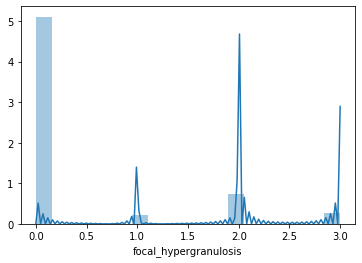

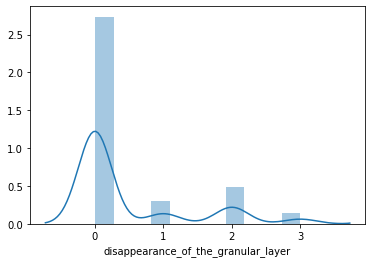

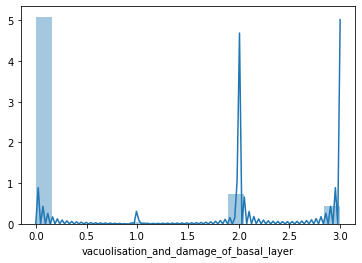

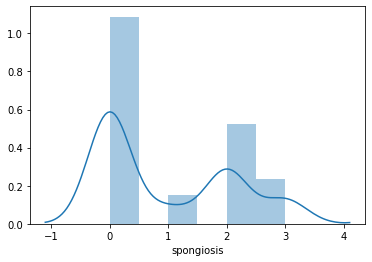

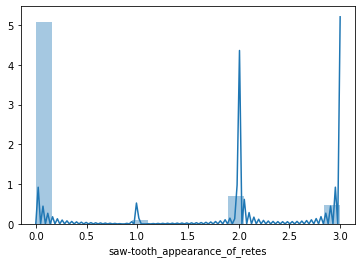

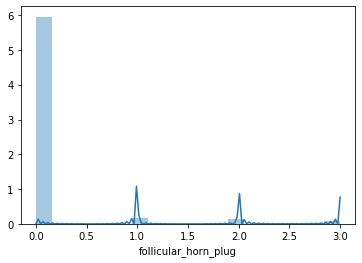

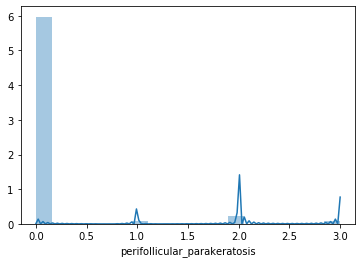

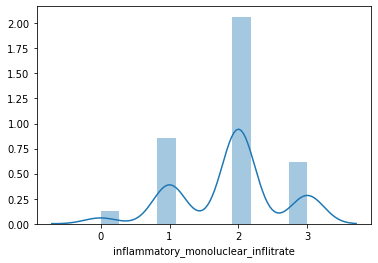

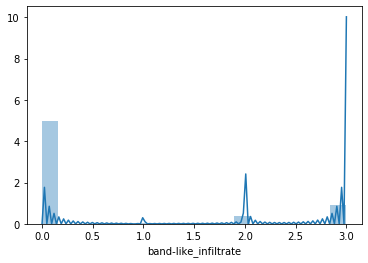

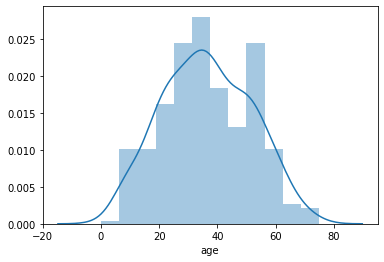

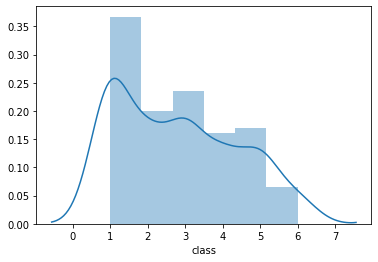

In [44]:
for i,e in enumerate(der.columns[0:]):
    plt.figure(i)
    sns.distplot(der[e])

We can see the distribution of all the variables.


### 4.	In case of K Means Clustering, Find out the optimal cluster size (K Value) for the data. (5 Marks)

In [53]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow plot')

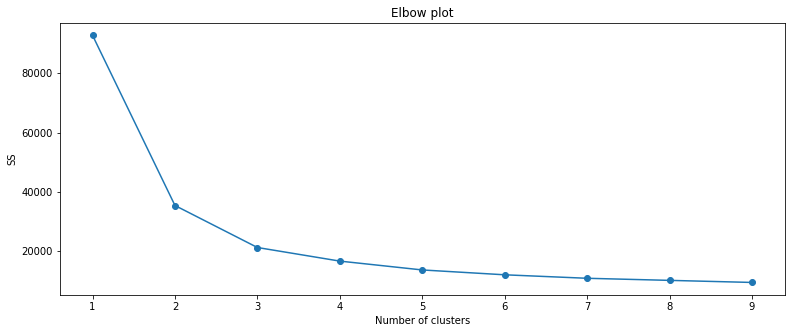

In [59]:
ss=[]
for num in range(1,10):
    kmean = KMeans(n_clusters=num)
    kmean.fit(X)
    ss.append(kmean.inertia_)


plt.figure(figsize = (13,5))    
plt.plot(range(1,10),ss,marker = 'o')    
plt.xlabel('Number of clusters')
plt.ylabel('SS')
plt.title("Elbow plot")

We are taking number of clusters 6 here.

## 5.	Apply Clustering and Generate Visualization (10 marks)               

### a.	Check if the Data has been scaled before applying clustering.

In [61]:
x=der.drop("class",axis=1)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

we scaled the data and will apply to k means.

In [63]:
pd.DataFrame(x_scaled,columns=x.columns).head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age
0,-0.102895,0.292503,-1.709375,1.437334,-0.699049,-0.468702,-0.292496,-0.452637,0.392453,-0.574000,...,-0.463831,-0.537770,-0.478502,1.813219,-0.475701,-0.230817,-0.235125,-1.194459,-0.502215,1.234417
1,1.403482,1.719916,1.600843,0.557628,0.403761,-0.468702,-0.292496,-0.452637,0.392453,0.531705,...,-0.463831,-0.537770,-0.478502,-0.844878,-0.475701,-0.230817,-0.235125,-1.194459,-0.502215,-1.870488
2,-0.102895,-1.134911,0.497437,1.437334,0.403761,2.669312,-0.292496,3.148777,-0.626255,-0.574000,...,1.893978,-0.537770,1.618885,1.813219,1.621970,-0.230817,-0.235125,0.184632,2.214200,-0.681375
3,-0.102895,0.292503,0.497437,-1.201784,-0.699049,-0.468702,-0.292496,-0.452637,2.429870,1.637410,...,-0.463831,2.935592,-0.478502,-0.844878,-0.475701,-0.230817,-0.235125,1.563724,-0.502215,0.243490
4,-0.102895,1.719916,0.497437,0.557628,1.506571,1.623308,-0.292496,1.948306,-0.626255,-0.574000,...,1.893978,1.777805,2.667578,0.927187,2.670805,-0.230817,-0.235125,0.184632,2.214200,0.573799


#### b.	Apply Clustering and find out if the data points have been clustered correctly.   Check what all Clustering Metrics will be used to support the answer.

In [64]:
# No. of clusters=6
kmeans=KMeans(n_clusters=6).fit(x_scaled)
Centroids=kmeans.cluster_centers_
print("Centriods:\n" ,kmeans.cluster_centers_)
print("\n")
labels=kmeans.labels_
print("Labels :",kmeans.labels_)

Centriods:
 [[ 0.61891102  0.61961825 -0.69791946  0.30104694 -0.6760737  -0.46870154
  -0.29249615 -0.45263665 -0.52013975 -0.41275117 -0.19060217 -0.46552851
   1.07966868  0.9151242  -0.39445573  0.79893087 -0.08495802 -0.44945262
  -0.06597222 -0.58961252 -0.58531766 -0.51253824 -0.09843086 -0.45151239
  -0.46383126 -0.51364951 -0.47850217  0.98256387 -0.47570133 -0.18450137
  -0.19243892 -0.36125784 -0.50221531 -0.07580864]
 [ 0.29788459  0.5544134   0.60879011 -0.37857305  0.04964773 -0.46870154
  -0.22809333 -0.45263665  1.06536163  1.15049403  0.50648285 -0.46552851
  -0.29423067  0.68088522 -0.39445573 -1.01653597  0.2161623   0.40675556
   0.79529125  1.41373049  1.1058565   1.39284137  0.83345021  1.06885782
  -0.46383126  0.88556482 -0.46888113 -0.84487783 -0.47570133 -0.23081653
  -0.23512537 -0.00515076 -0.47729406  0.1865194 ]
 [-0.90038827 -0.96697956 -0.80068768  0.48863132 -0.69904891 -0.46870154
   0.12043959 -0.45263665 -0.58630587 -0.57399979 -0.37914377 -0.4655285

In [70]:
der["Labels"]=labels

In [72]:
der["Labels"].value_counts()

1    109
4     71
3     67
2     51
0     48
5     20
Name: Labels, dtype: int64

The data points are clustered correctly and there are six clusters we can observe here clearly,

In [82]:
## Visualization

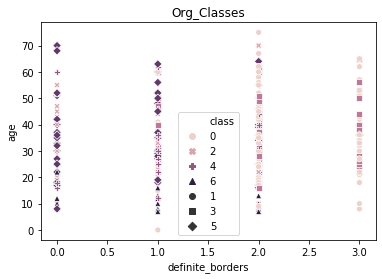

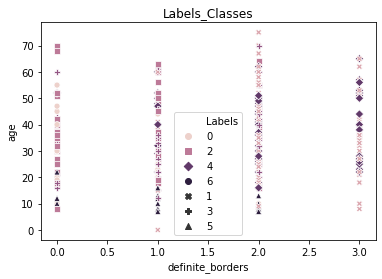

In [81]:
plt.title('Org_Classes')
sns.scatterplot(x = 'definite_borders',y = 'age',hue = 'class',style = 'class',data = der)
plt.show()

plt.title('Labels_Classes')
sns.scatterplot(x = 'definite_borders',y = 'age',hue = 'Labels',style = 'Labels',data = der)
plt.show()



## 6.	Split dataset into train and test (70:30) (5 marks)
#### a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [83]:
import scipy.stats as st

In [84]:
X=der.drop('class', axis=1)
Y= der['class']

In [85]:
from sklearn.model_selection import train_test_split
X_train ,X_test, Y_train , Y_test = train_test_split(X , Y , test_size = 0.30 , random_state =42)
X_train.shape , Y_train.shape

((256, 35), (256,))

H0:mu of Y_train=mu of Y_test =mu of Y H1:any one of them differs

In [86]:
st.f_oneway(Y_train,Y_test,Y)

F_onewayResult(statistic=0.6007740833564885, pvalue=0.5486582512264491)

P value is greater than 0.05 so we are fai to reject null hypothesis.so mean are same of all.

## 7.	Fit the Clustering models and explain the reason of selecting that model. Please write your key observations (15 marks) 
#### a.	What is the overall Accuracy? Please comment on whether it is good or not. 
#### b.	What is Precision, Recall and WCSS, Silhouette - Score that can justify the deployment of the model.
#### c.	What is Cohen’s Kappa Value and what inference do you make from the model
#### d.	Which other key model output parameters do you want to look at? 


In [88]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

Z-Shape: (365, 4)


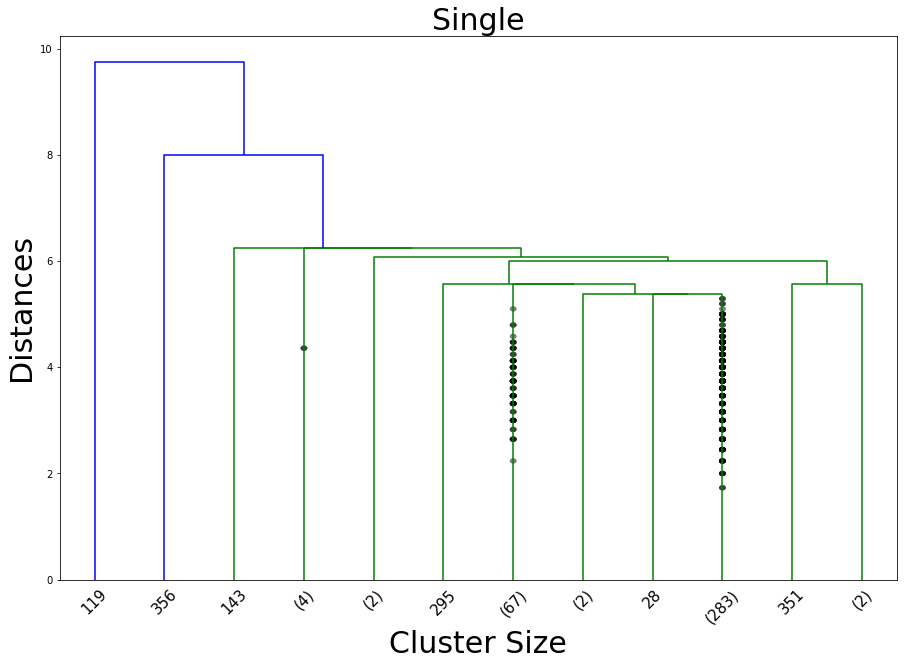

In [90]:
plt.figure(figsize=(15,10))
Z=linkage(der.drop(['class'],axis=1),method='single')
print("Z-Shape:",Z.shape)
plt.title("Single",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

In [92]:
from sklearn.cluster import AgglomerativeClustering
hie_clus = AgglomerativeClustering(n_clusters=6,affinity='euclidean')

cluster2 = hie_clus.fit_predict(X)
der['agglomerative']=cluster2
der['agglomerative'].value_counts()

0    119
1     73
2     64
3     52
4     32
5     26
Name: agglomerative, dtype: int64

In [97]:
accuracy_score(der['class'],der['Labels'])
 

0.3005464480874317

In [99]:
cohen_kappa_score(der['class'],der['Labels']) 

0.14271597708931882

Overall accuracy is the probability that an individual will be correctly classified by a test; that is, the sum of the true positives plus true negatives divided by the total number of individuals tested.

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. F1 Score = 2*(Recall * Precision) / (Recall + Precision)

## .8 In case of a Supervised Machine Learning Problem, how will you decide when to Apply PCA & How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
##### Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [100]:
sonar.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [101]:
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
%matplotlib inline

In [106]:
sonar["Class"].value_counts()

M    111
R     97
Name: Class, dtype: int64

In [107]:
sonar.describe().T

,count,mean,std,min,25%,50%,75%,max
1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [108]:
sonar.corr()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
9,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
10,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [109]:
sonar.cov()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
1,0.000529,0.000558,0.000505,0.000526,0.000440,0.000325,0.000371,0.000696,0.000962,0.000984,...,7.025008e-05,0.000079,5.060106e-05,0.000054,5.085173e-05,0.000029,0.000042,0.000055,0.000051,0.000040
2,0.000558,0.001086,0.000988,0.000930,0.000768,0.000647,0.000568,0.000939,0.001236,0.001200,...,1.268688e-04,0.000138,8.053483e-05,0.000092,8.880939e-05,0.000050,0.000053,0.000075,0.000072,0.000059
3,0.000505,0.000988,0.001477,0.001398,0.001166,0.000786,0.000452,0.000778,0.001150,0.001135,...,1.098793e-04,0.000146,9.032463e-05,0.000103,7.891224e-05,0.000063,0.000085,0.000083,0.000101,0.000072
4,0.000526,0.000930,0.001398,0.002165,0.001879,0.000970,0.000708,0.000978,0.001361,0.001487,...,9.759676e-05,0.000168,1.198287e-04,0.000114,9.397046e-05,0.000075,0.000092,0.000104,0.000121,0.000094
5,0.000440,0.000768,0.001166,0.001879,0.003086,0.001960,0.001151,0.000965,0.001170,0.001368,...,7.734075e-05,0.000143,1.235425e-04,0.000083,7.735761e-05,0.000064,0.000071,0.000086,0.000100,0.000071
6,0.000325,0.000647,0.000786,0.000970,0.001960,0.003493,0.002567,0.002374,0.002292,0.002293,...,1.219147e-04,0.000144,6.777177e-05,0.000071,5.591053e-05,0.000057,0.000055,0.000078,0.000081,0.000053
7,0.000371,0.000568,0.000452,0.000708,0.001151,0.002567,0.003818,0.003555,0.003442,0.003533,...,1.366372e-04,0.000086,2.024295e-05,0.000074,8.563311e-05,0.000062,0.000067,0.000097,0.000070,0.000069
8,0.000696,0.000939,0.000778,0.000978,0.000965,0.002374,0.003555,0.007251,0.007849,0.007469,...,2.665704e-04,0.000180,6.159155e-05,0.000145,1.445756e-04,0.000135,0.000132,0.000158,0.000102,0.000063
9,0.000962,0.001236,0.001150,0.001361,0.001170,0.002292,0.003442,0.007849,0.014016,0.013958,...,2.486084e-04,0.000237,8.805901e-05,0.000175,1.504830e-04,0.000158,0.000133,0.000178,0.000071,0.000057
10,0.000984,0.001200,0.001135,0.001487,0.001368,0.002293,0.003533,0.007469,0.013958,0.018068,...,2.697150e-04,0.000214,9.257086e-05,0.000144,1.669628e-04,0.000117,0.000109,0.000185,0.000048,0.000066


In [110]:
#Without PCA

In [111]:
from sklearn.linear_model import LogisticRegression


Logistic Regression Training Score: 
 98.83
Logistic Regression Test Score: 
 97.27
Coefficient: 
 [[-2.75979264e-01  1.03290860e-01  3.47497836e-01 -2.45860588e-01
   3.02038727e-01 -5.93944382e-02 -1.81113564e-01 -4.78517500e-02
   3.21509287e-01  4.44349882e-01  1.03200704e-01 -5.27107393e-02
  -2.05239390e-01  2.79943380e-01 -7.78416899e-01 -7.11106190e-01
  -2.92099554e-01  1.84589136e-01 -3.30908966e-02  1.14036755e+00
   4.55779320e-01  1.00837651e+00  2.29933435e-01  3.41671927e-01
  -5.51832607e-02  4.29874025e-01 -5.57845678e-02 -9.87941476e-01
  -1.20475488e-01 -5.69772875e-02 -8.29666662e-02 -9.50719256e-02
  -9.30299613e-02 -1.82404706e-03 -9.19815395e-01]
 [ 5.32515840e-02  1.47603317e-01  1.99074927e-01  6.89824733e-01
  -2.31709554e+00 -3.73446915e-01 -3.99253630e-01 -2.55622746e-01
  -5.59718070e-02 -3.68122570e-02 -1.30260342e-01 -3.07975760e-01
   5.41597257e-01  8.93989860e-01 -1.01682404e+00  1.47506903e-01
  -1.72359733e-01 -1.60649906e-01 -6.30240060e-01 -6.75220

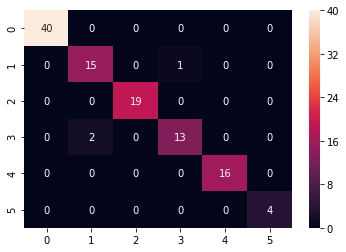

In [112]:
## using Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, Y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, Y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, Y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(Y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(Y_test,log_predicted))
print('Classification Report: \n', classification_report(Y_test,log_predicted))

sns.heatmap(confusion_matrix(Y_test,log_predicted),annot=True,fmt="d")

In [113]:
from sklearn.neighbors import KNeighborsClassifier

# fitting base model with default params
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [114]:
# predicting X_test
y_pred = model_knn.predict(X_test)

# checking for model overfit
print("Training accuracy:", accuracy_score(Y_train,model_knn.predict(X_train)))
print("Test accuracy:", accuracy_score(Y_test,y_pred))

Training accuracy: 0.9140625
Test accuracy: 0.8636363636363636


In [115]:
from sklearn.ensemble import RandomForestClassifier 

In [116]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
# predicting X_test
y_pred = model_rfc.predict(X_test)

# checking for model overfit
print("Training accuracy:", accuracy_score(Y_train,model_knn.predict(X_train)))
print("Test accuracy:", accuracy_score(Y_test,y_pred))`

Training accuracy: 0.9140625
Test accuracy: 0.9636363636363636


In [118]:
##Wih PCA

In [147]:
x=sonar.drop("Class",axis=1)
y=sonar["Class"]

In [148]:

X_std = StandardScaler().fit_transform(x)

In [149]:
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
%matplotlib inline

In [150]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00483092 0.73945066 0.57429766 ... 0.36991041 0.35884169 0.34875426]
 [0.73945066 1.00483092 0.78368358 ... 0.35474733 0.35390122 0.36049435]
 [0.57429766 0.78368358 1.00483092 ... 0.3357225  0.42710038 0.37575477]
 ...
 [0.36991041 0.35474733 0.3357225  ... 1.00483092 0.55289311 0.3314201 ]
 [0.35884169 0.35390122 0.42710038 ... 0.55289311 1.00483092 0.64597769]
 [0.34875426 0.36049435 0.37575477 ... 0.3314201  0.64597769 1.00483092]]


In [151]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [152]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.13637827 -0.12230469  0.01599221 ...  0.00396327 -0.03780699
   0.01103853]
 [-0.14605308 -0.13107841  0.01670347 ... -0.02693425  0.00306459
  -0.0233158 ]
 [-0.11572088 -0.14241443  0.00835943 ... -0.02185039  0.0407831
  -0.01484449]
 ...
 [-0.134271   -0.11031767 -0.01700485 ... -0.02612236 -0.00064993
   0.05018827]
 [-0.14375632 -0.09028263 -0.07281863 ... -0.05219327  0.00796663
  -0.08260927]
 [-0.11784172 -0.0752713  -0.06901339 ...  0.06498009  0.03062646
   0.03637468]]

 Eigen Values 
%s [1.22669095e+01 1.13931044e+01 5.15477569e+00 3.42397563e+00
 3.01876124e+00 2.45077973e+00 1.97689941e+00 1.83670984e+00
 1.54701416e+00 1.50188197e+00 1.25118344e+00 1.14670699e+00
 1.05325145e+00 9.27549901e-01 8.60816754e-01 8.20519978e-01
 7.44343528e-01 7.04574996e-01 6.21452439e-01 5.90238811e-01
 5.69184034e-01 5.35109034e-01 5.06358875e-01 4.64737161e-01
 4.35250297e-01 4.19841018e-01 3.71006312e-01 3.20501109e-01
 3.16349760e-01 2.98674285e-01 2.87102241e-01

In [153]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [154]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 20.34655665  39.24377302  47.79376154  53.47295189  58.48003183
  62.54502706  65.82401887  68.87048471  71.43644569  73.927548
  76.00282822  77.90481818  79.65179775  81.19028196  82.61807898
  83.9790376   85.21364585  86.38229188  87.41306636  88.39206823
  89.33614752  90.22370818  91.06358227  91.83442035  92.55634993
  93.25272085  93.8680919   94.39969229  94.92440704  95.41980429
  95.89600753  96.33217465  96.70462544  97.04133071  97.35184122
  97.6550068   97.94270414  98.18727823  98.40677326  98.61688827
  98.80144683  98.95968265  99.09643533  99.22216871  99.3249007
  99.41981773  99.51363595  99.58440284  99.64376788  99.69589846
  99.74462542  99.79204664  99.83042005  99.86709061  99.8992785
  99.92630198  99.9509474   99.97027297  99.98898909 100.        ]


In [ ]:
plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

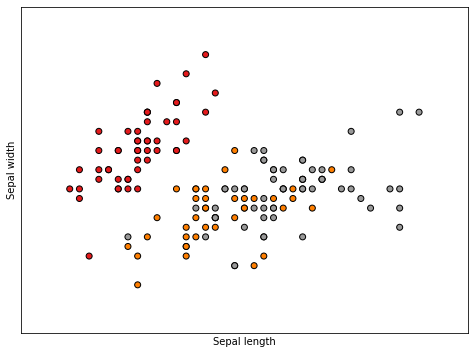

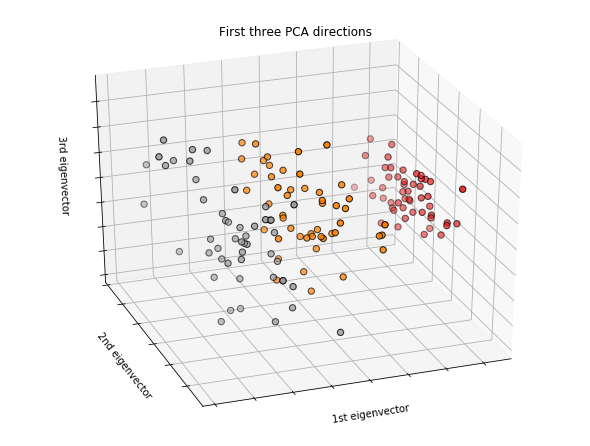

In [156]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [162]:
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [164]:
## Decision tree after applying PCA

In [166]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [168]:
y_pred_DT = model.predict(X_test)

In [ ]:
cm_DT= confusion_matrix(X_test, y_pred_DT)
cm_DT

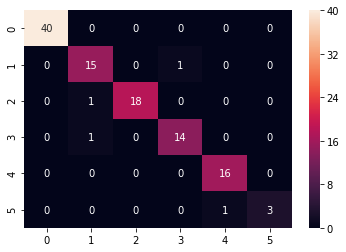

In [143]:
sns.heatmap(cm_DT, annot=True)
plt.show()

In [145]:
classification=classification_report(y_test,y_pred_DT)
print(classification)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.88      0.94      0.91        16
           3       1.00      0.95      0.97        19
           4       0.93      0.93      0.93        15
           5       0.94      1.00      0.97        16
           6       1.00      0.75      0.86         4

    accuracy                           0.96       110
   macro avg       0.96      0.93      0.94       110
weighted avg       0.97      0.96      0.96       110



In [146]:
ac = accuracy_score(y_test, y_pred_DT)
print("Accuracy Score:", ac)

Accuracy Score: 0.9636363636363636


With PCA Accuracy is improving.

## 9.	Summarize as follows (10 marks) 
#### 1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
#### 2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
#### 3.	What changes from the base model had the most effect on model performance?
#### 4.	What are the key risks to your results and interpretation?


1.We get really good accuracy with PCA decision tree,so with PCA decision tree is the best model.

2.Best features are 16 to 48 for this data set.

3.We apply PCA on the base model and using decision tree classifier and scaling the data effects the most on accuracy.

4.Mitigating Risk of Machine Learning
Data Difficulties.
Technology Troubles.
Security Snags.
Models Misbehaving.
Interaction Issues.